## Loading & preparation

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import requests
import json

pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
import plotly.express as px
import plotly.io as pio
pio.templates[pio.templates.default].layout.colorway = ['#7BA23F','#2D6D4B','#1B813E','#2D6D4B']

In [3]:
%run functions.ipynb

Load bike station data

In [4]:
r = requests.get('https://tor.publicbikesystem.net/ube/gbfs/v1/en/station_information')

bikeshare_stations = pd.DataFrame(json.loads(r.content)['data']['stations'])[['station_id', 'name', 'lat', 'lon']].astype({
    'station_id': 'string',
})

bikeshare_stations

station_id                          name        lat        lon
0         7000  Fort York  Blvd / Capreol Ct  43.639832 -79.395954
1         7001     Wellesley Station Green P  43.664964 -79.383550
2         7002    St. George St / Bloor St W  43.667333 -79.399429
3         7003      Madison Ave / Bloor St W  43.667158 -79.402761
4         7004       University Ave / Elm St  43.656518 -79.389099
..         ...                           ...        ...        ...
612       7686  Lower Jarvis / The Esplanade  43.647821 -79.370472
613       7687     Bloor / Gladstone - SMART  43.660202 -79.434273
614       7688  High Park Blvd / Parkside Dr  43.644887 -79.456412
615       7689                      20 Eaton  43.680012 -79.344033
616       7691       Christie St / Dupont St  43.671656 -79.420727

[617 rows x 4 columns]

Load ridership data:

In [10]:
for i in range(1, 13):
    if i < 10:
        df_new = pd.read_csv("bike-share-ridership-2021-0"+ str(i) +".csv", encoding='cp1252')
    else:
        df_new = pd.read_csv("bike-share-ridership-2021-"+ str(i) +".csv", encoding='cp1252')
    
    if i == 1:
        df = df_new
    else:
        df = pd.concat([df, df_new])
df        

Trip Id  Trip  Duration  Start Station Id        Start Time  \
0       10644218.0            1315              7021  01/01/2021 00:04   
1       10644220.0             396              7534  01/01/2021 00:07   
2       10644221.0              86              7162  01/01/2021 00:10   
3       10644222.0             741              7003  01/01/2021 00:10   
4       10644223.0            2073              7562  01/01/2021 00:11   
...            ...             ...               ...               ...   
145844         NaN             372              7065  12/31/2021 23:56   
145845         NaN             762              7233  12/31/2021 23:56   
145846         NaN             355              7065  12/31/2021 23:56   
145847         NaN             770              7292  12/31/2021 23:56   
145848         NaN            1307              7057  12/31/2021 23:59   

                          Start Station Name  End Station Id  \
0                         Bay St / Albert St          7164.0   
1                    Walnut Ave / Queen St W          7524.0   
2                   Hayter St / Laplante Ave          7006.0   
3                   Madison Ave / Bloor St W          7272.0   
4       Priscilla  Ave / Dundas St W - SMART          7562.0   
...                                      ...             ...   
145844           Dundas St E / Parliament St          7472.0   
145845              King / Cowan Ave - SMART          7569.0   
145846           Dundas St E / Parliament St          7472.0   
145847         Granby St / Church St - SMART          7076.0   
145848       Simcoe St / Wellington St South          7383.0   

                End Time                          End Station Name  Bike Id  \
0       01/01/2021 00:26  Gould St / Yonge St (Ryerson University)   6795.0   
1       01/01/2021 00:13                               Lisgar Park   4176.0   
2       01/01/2021 00:11           Bay St / College St (East Side)   1814.0   
3       01/01/2021 00:22           Yonge St / Dundonald St - SMART    198.0   
4       01/01/2021 00:45      Priscilla  Ave / Dundas St W - SMART   6688.0   
...                  ...                                       ...      ...   
145844  01/01/2022 00:02                 Dundas St E / Victoria St   3487.0   
145845  01/01/2022 00:08                     Toronto Inukshuk Park   4195.0   
145846  01/01/2022 00:02                 Dundas St E / Victoria St   4574.0   
145847  01/01/2022 00:09                   York St / Queens Quay W   5879.0   
145848  01/01/2022 00:21                             12 Harbour St   1655.0   

            User Type  ï»¿Trip Id  
0       Annual Member         NaN  
1       Casual Member         NaN  
2       Annual Member         NaN  
3       Casual Member         NaN  
4       Casual Member         NaN  
...               ...         ...  
145844  Casual Member  14805103.0  
145845  Annual Member  14805104.0  
145846  Casual Member  14805105.0  
145847  Annual Member  14805107.0  
145848  Annual Member  14805108.0  

[3575182 rows x 11 columns]

## Brief on raw data

- 3,575,182 trips in total
- Average trip duration: 1036.32 seconds (17.27 minutes)

In [15]:
df.describe()

Trip Id  Trip  Duration  Start Station Id  End Station Id  \
count   510394.0000    3575182.0000      3575182.0000    3573213.0000   
mean  11388908.2567       1036.3292         7262.9166       7260.1817   
std     337580.4302       4401.9498          185.7092        184.9005   
min   10644218.0000          0.0000         7000.0000       7000.0000   
25%   11334012.7500        455.0000         7093.0000       7089.0000   
50%   11482537.5000        765.0000         7245.0000       7242.0000   
75%   11626507.5000       1202.0000         7411.0000       7408.0000   
max   11768966.0000    1537976.0000         7688.0000       7688.0000   

           Bike Id    ï»¿Trip Id  
count 3574979.0000  3064788.0000  
mean     3857.2817 12955598.9936  
std      1964.7998  1134712.3676  
min        14.0000 10748540.0000  
25%      2282.0000 12142672.7500  
50%      4149.0000 13026244.5000  
75%      5577.0000 13905186.5000  
max      6936.0000 14805108.0000

- Annual Member trips: 2,140,730 (59.87%)
- Casual Member trips: 1,434,452 (40.12%)

In [16]:
df.groupby("User Type").count()

Trip Id  Trip  Duration  Start Station Id  Start Time  \
User Type                                                              
Annual Member   301569         2140730           2140730     2140730   
Casual Member   208825         1434452           1434452     1434452   

               Start Station Name  End Station Id  End Time  End Station Name  \
User Type                                                                       
Annual Member             2138738         2139598   2140730           2137428   
Casual Member             1432764         1433615   1434452           1431860   

               Bike Id  ï»¿Trip Id  
User Type                           
Annual Member  2140597     1839161  
Casual Member  1434382     1225627

### Cleaning

In [17]:
df = clean(df)
df = conversion(df)

In [18]:
df = calculation(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474290 entries, 0 to 3569339
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Trip Id             float64       
 1   Trip  Duration      int64         
 2   Start Station Id    string        
 3   Start Time          datetime64[ns]
 4   Start Station Name  object        
 5   End Station Id      string        
 6   End Time            datetime64[ns]
 7   End Station Name    object        
 8   Bike Id             string        
 9   User Type           object        
 10  ï»¿Trip Id          float64       
 11  routes              string        
 12  distance            float64       
 13  avg_speed           float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), string(4)
memory usage: 397.6+ MB


In [20]:
df.describe()

Trip Id  Trip  Duration    ï»¿Trip Id     distance    avg_speed
count   491764.0000    3474290.0000  2982526.0000 3474290.0000 3474290.0000
mean  11390690.1640        982.5880 12965320.1229    1813.0008       2.2848
std     336354.2679       1227.2025  1134345.1817    1325.1321       1.1035
min   10644218.0000         10.0000 10748540.0000       0.0000       0.0000
25%   11335289.7500        458.0000 12151743.2500     869.8223       1.6918
50%   11483453.5000        768.0000 13039254.5000    1533.7454       2.3934
75%   11626995.2500       1205.0000 13915359.7500    2465.9857       2.9859
max   11768966.0000      43189.0000 14805108.0000   35264.6504      29.7938

### Facts after data cleaning:
- 3,474,290 trips in total
- Average trip duration: 1227.20 seconds (20.45 minutes)
- Average distance: 1813.00 metres
- Average speed: 2.28 m/s

In [23]:
df.groupby("User Type")["Trip  Duration"].count()

User Type
Annual Member    2075217
Casual Member    1399073
Name: Trip  Duration, dtype: int64

- Annual Member trips: 2,075,217 (59.73%)
- Casual Member trips: 1,399,073 (40.27%)

Questions:

- How many trips did poeple in Toronto had with Bike Share Toronto in 2021?
- Was the ridership affected by season, weather, COVID-19, festivals and holidays, etc.?
- What are the riders' behavior in terms of distance, speed, time of the day, day of the week, etc.?
- What are the most popular cycling routes? Average speed on those routes? Any changes through the season?
- Troubleshooting: which stations and bikes were frequently caught up in malfunctionings?

## How many trips did poeple in Toronto had with Bike Share Toronto in 2021?

In [24]:
byDate = df.groupby([df['Start Time'].dt.date])["Start Station Id"].count()
byDate = byDate.reset_index()
byDate

Start Time  Start Station Id
0    2021-01-01              1715
1    2021-01-02              1807
2    2021-01-03              1845
3    2021-01-04              2854
4    2021-01-05              2624
..          ...               ...
360  2021-12-27              1264
361  2021-12-28              3044
362  2021-12-29              3516
363  2021-12-30              4033
364  2021-12-31              4824

[365 rows x 2 columns]

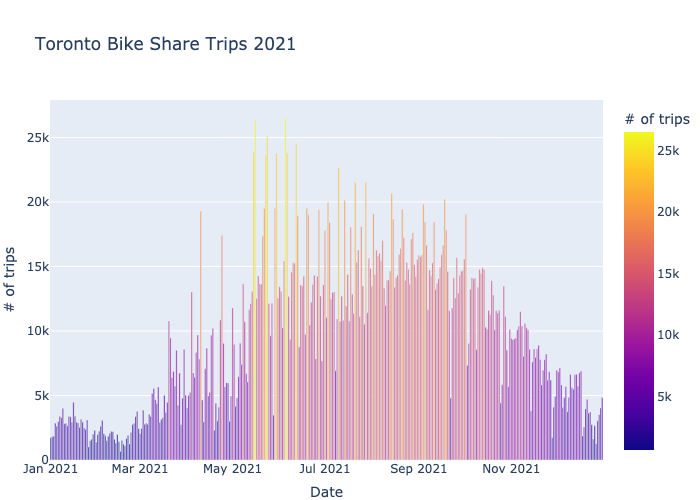

In [44]:
fig = px.bar(byDate, x='Start Time', y='Start Station Id',
             color='Start Station Id',
             labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, 
             title='Toronto Bike Share Trips 2021')

fig.update_layout(margin ={'l':50,'b':0,'r':0})

#generate interactive graph in Jupyter Notebook
fig.show()

#generate static graph for GitHub display
fig.show(renderer="png")

#generate interactive html file
fig.write_html("visuals/byDate-bar.html")

Plot for annual and casual members

In [224]:
byDate_line = df.groupby([df['Start Time'].dt.date, 'User Type'])["Start Station Id"].count()
byDate_line = byDate_line.reset_index()

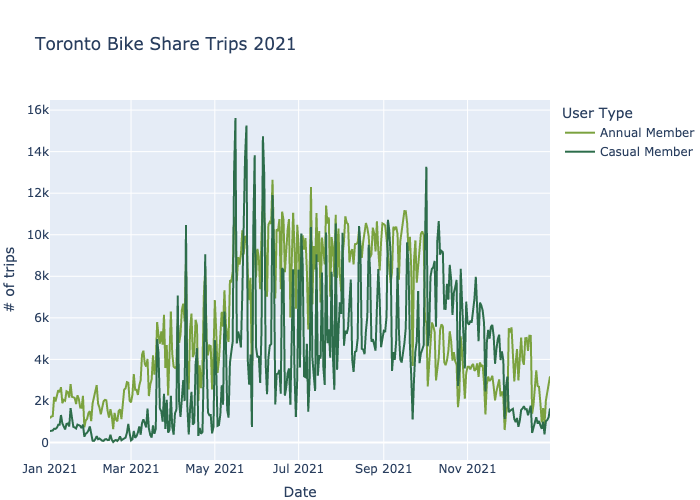

In [225]:
fig = px.line(byDate_line, x='Start Time', y='Start Station Id', 
              labels={'Start Time':'Date', 'Start Station Id':'# of trips'}, color='User Type',
              title='Toronto Bike Share Trips 2021')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byDate-line.html")

In [40]:
byMonth = df.groupby([df['Start Time'].dt.month, 'User Type'])["Start Station Id"].count()
byMonth = byMonth.reset_index()

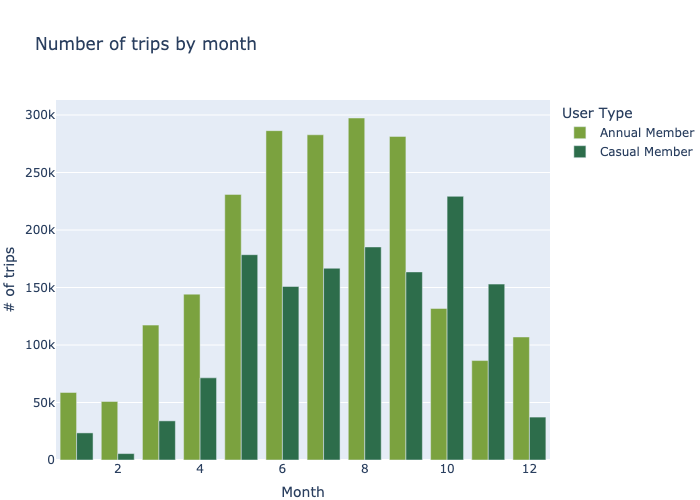

In [41]:
fig = px.bar(byMonth, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Month', 'Start Station Id':'# of trips'}, 
             title='Number of trips by month')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byMonth-bar.html")

In [48]:
byWeek = df.groupby([df['Start Time'].dt.weekday, 'User Type'])["Start Station Id"].count()
byWeek = byWeek.reset_index()

In [49]:
byWeek["Start Time"] = byWeek["Start Time"].astype("string")
byWeek = byWeek.replace({'Start Time': {"0": "Mon", "1": "Tue", "2": "Wed", "3": "Thu", 
                                        "4": "Fri", "5": "Sat", "6": "Sun"}})

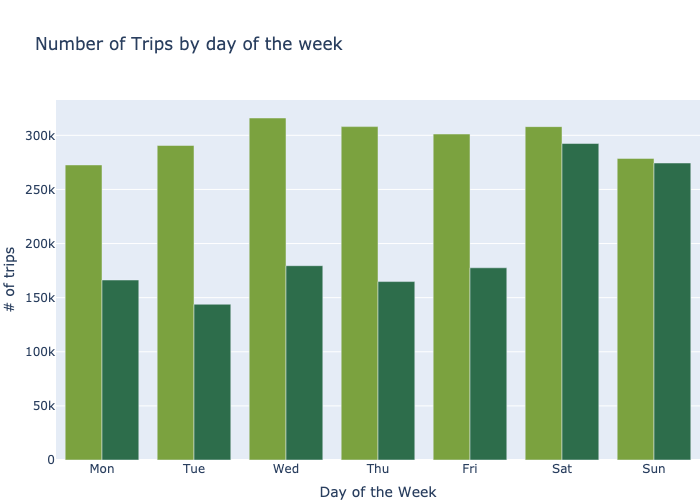

In [74]:
fig = px.bar(byWeek, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Day of the Week', 'Start Station Id':'# of trips'}, 
             title='Number of Trips by day of the week')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byWeek-bar.html")

In [46]:
byHr = df.groupby([df['Start Time'].dt.hour, 'User Type'])["Start Station Id"].count()
byHr = byHr.reset_index()

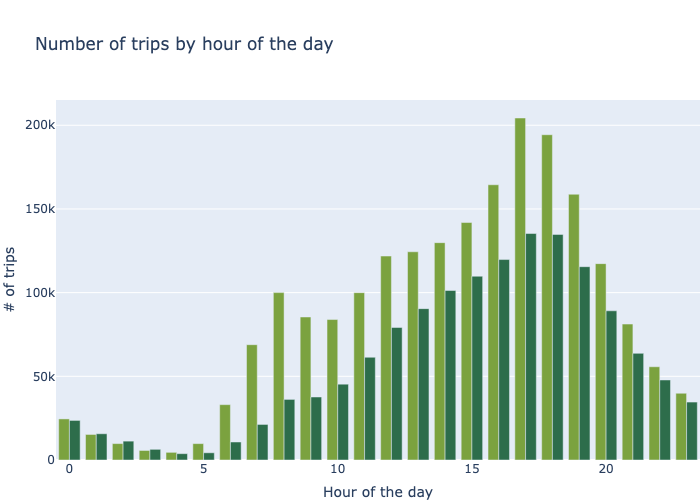

In [73]:
fig = px.bar(byHr, x='Start Time', y='Start Station Id',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Hour of the day', 'Start Station Id':'# of trips'}, 
             title='Number of trips by hour of the day')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byHr-bar.html")

### What factors affected ridership?

The monthly ridership plot revealed the impact of weather: summer definitely is the season when more people use Share Bike Toronto

In general, annual members had more trips; but there were more casual member trips in Oct and Nov than annual member trips. It might be caused by more members, more trips per member, or both. 

From the ridership plot by each day of 2021, we found a few outstanding "spikes" on: 05/16, 05/24, 06/05, 06/12, 07/10, 10/02.

All these days seemed to be gamedays (the first result when I googled date+Toronto), even though the baseball game didn't return to Rogers Centre until Jul 30.

In [17]:
COVID = pd.read_csv("COVID19 cases.csv")

In [18]:
COVID2021 = COVID[COVID["Reported Date"].str[:4]=="2021"]
COVID2021["Reported Date"] = pd.to_datetime(COVID2021["Reported Date"])

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_53091/727373760.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
case_by_day = COVID2021.groupby(COVID2021['Reported Date'].dt.date)["Assigned_ID"].count()
case_by_day = case_by_day.reset_index()

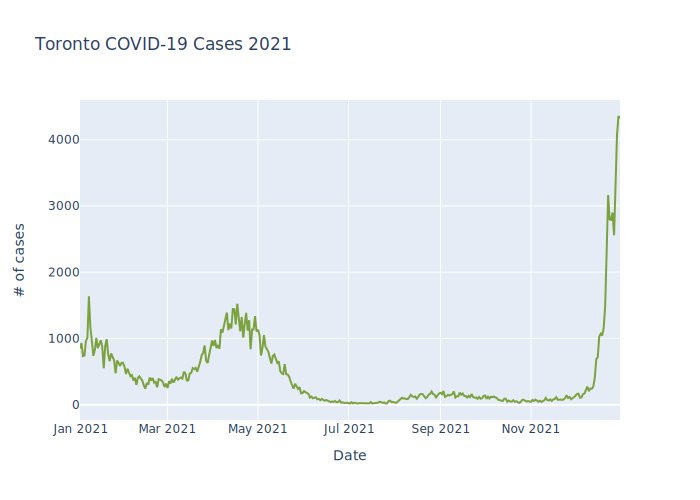

In [205]:
fig = px.line(case_by_day, x='Reported Date', y='Assigned_ID', 
              labels={'Reported Date':'Date', 'Assigned_ID':'# of cases'}, 
              title='Toronto COVID-19 Cases 2021')
#fig.show()
fig.show(renderer="svg")

As weather seemed to be an important indicator on monthly basis, we retrieve daily weather data of Toronto City weather station from https://climate.weather.gc.ca/historical_data/search_historic_data_e.html 

In [141]:
weather = pd.read_csv("weather_toronto_2021.csv")
weather

Longitude (x)  Latitude (y)  Station Name  Climate ID   Date/Time  Year  \
0            -79.4         43.67  TORONTO CITY     6158355  2021-01-01  2021   
1            -79.4         43.67  TORONTO CITY     6158355  2021-01-02  2021   
2            -79.4         43.67  TORONTO CITY     6158355  2021-01-03  2021   
3            -79.4         43.67  TORONTO CITY     6158355  2021-01-04  2021   
4            -79.4         43.67  TORONTO CITY     6158355  2021-01-05  2021   
..             ...           ...           ...         ...         ...   ...   
360          -79.4         43.67  TORONTO CITY     6158355  2021-12-27  2021   
361          -79.4         43.67  TORONTO CITY     6158355  2021-12-28  2021   
362          -79.4         43.67  TORONTO CITY     6158355  2021-12-29  2021   
363          -79.4         43.67  TORONTO CITY     6158355  2021-12-30  2021   
364          -79.4         43.67  TORONTO CITY     6158355  2021-12-31  2021   

     Month  Day  Data Quality  Max Temp (°C)  ... Total Snow (cm)  \
0        1    1           NaN            2.5  ...             NaN   
1        1    2           NaN            2.2  ...             NaN   
2        1    3           NaN            2.1  ...             NaN   
3        1    4           NaN            1.7  ...             NaN   
4        1    5           NaN            1.6  ...             NaN   
..     ...  ...           ...            ...  ...             ...   
360     12   27           NaN            1.3  ...             NaN   
361     12   28           NaN            3.1  ...             NaN   
362     12   29           NaN            3.3  ...             NaN   
363     12   30           NaN            3.5  ...             NaN   
364     12   31           NaN            7.1  ...             NaN   

     Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0                NaN               6.8                NaN               NaN   
1                NaN              10.8                NaN               0.0   
2                NaN               1.7                NaN               0.0   
3                NaN               0.0                NaN               NaN   
4                NaN               0.4                NaN               NaN   
..               ...               ...                ...               ...   
360              NaN               1.9                NaN               NaN   
361              NaN               0.3                NaN               3.0   
362              NaN               0.1                NaN               1.0   
363              NaN               0.0                NaN               0.0   
364              NaN               0.0                NaN               1.0   

     Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                  NaN                       NaN                     M   
1                  NaN                       NaN                     M   
2                  NaN                       NaN                     M   
3                  NaN                       NaN                     M   
4                  NaN                       NaN                     M   
..                 ...                       ...                   ...   
360                NaN                       NaN                     M   
361                NaN                       NaN                     M   
362                NaN                       NaN                     M   
363                NaN                       NaN                     M   
364                NaN                       NaN                     M   

    Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                      NaN                     M  
1                      NaN                     M  
2                      NaN                     M  
3                      NaN                     M  
4                      NaN                     M  
..                     ...                   ...  
360                 

In [132]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              365 non-null    float64
 1   Latitude (y)               365 non-null    float64
 2   Station Name               365 non-null    object 
 3   Climate ID                 365 non-null    int64  
 4   Date/Time                  365 non-null    object 
 5   Year                       365 non-null    int64  
 6   Month                      365 non-null    int64  
 7   Day                        365 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              3 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              3 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

In [142]:
weather = weather[["Date/Time", "Max Temp (°C)", "Min Temp (°C)", "Total Precip (mm)", "Snow on Grnd (cm)"]]
weather

Date/Time  Max Temp (°C)  Min Temp (°C)  Total Precip (mm)  \
0    2021-01-01            2.5           -1.0                6.8   
1    2021-01-02            2.2           -0.9               10.8   
2    2021-01-03            2.1            0.2                1.7   
3    2021-01-04            1.7           -0.1                0.0   
4    2021-01-05            1.6            0.6                0.4   
..          ...            ...            ...                ...   
360  2021-12-27            1.3           -5.3                1.9   
361  2021-12-28            3.1           -0.1                0.3   
362  2021-12-29            3.3            0.7                0.1   
363  2021-12-30            3.5            1.7                0.0   
364  2021-12-31            7.1            2.7                0.0   

     Snow on Grnd (cm)  
0                  NaN  
1                  0.0  
2                  0.0  
3                  NaN  
4                  NaN  
..                 ...  
360                NaN  
361                3.0  
362                1.0  
363                0.0  
364                1.0  

[365 rows x 5 columns]

In [143]:
weather['Snow on Grnd (cm)'].fillna(0.0, inplace = True)
weather

/Users/lizhaotian/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date/Time  Max Temp (°C)  Min Temp (°C)  Total Precip (mm)  \
0    2021-01-01            2.5           -1.0                6.8   
1    2021-01-02            2.2           -0.9               10.8   
2    2021-01-03            2.1            0.2                1.7   
3    2021-01-04            1.7           -0.1                0.0   
4    2021-01-05            1.6            0.6                0.4   
..          ...            ...            ...                ...   
360  2021-12-27            1.3           -5.3                1.9   
361  2021-12-28            3.1           -0.1                0.3   
362  2021-12-29            3.3            0.7                0.1   
363  2021-12-30            3.5            1.7                0.0   
364  2021-12-31            7.1            2.7                0.0   

     Snow on Grnd (cm)  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
..                 ...  
360                0.0  
361                3.0  
362                1.0  
363                0.0  
364                1.0  

[365 rows x 5 columns]

In [152]:
byDate_new = byDate.pivot(index = "Start Time", columns = 'User Type').reset_index()
byDate_new.columns = ['Date', 'Annual', 'Casual']
byDate_new

Date  Annual  Casual
0    2021-01-01    1165     550
1    2021-01-02    1254     553
2    2021-01-03    1267     578
3    2021-01-04    2192     662
4    2021-01-05    1969     655
..          ...     ...     ...
360  2021-12-27     872     392
361  2021-12-28    2018    1026
362  2021-12-29    2437    1079
363  2021-12-30    2814    1219
364  2021-12-31    3184    1640

[365 rows x 3 columns]

In [155]:
byDate_new["Date"] = byDate_new["Date"].astype("string")
weather["Date/Time"] = weather["Date/Time"].astype("string")

/var/folders/32/_h9xt16s0rv7h9qc5gt4hqbw0000gn/T/ipykernel_53091/517291084.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
byDate_weather = pd.merge(byDate_new, weather, how='outer', left_on = "Date", right_on="Date/Time")
byDate_weather

Date  Annual  Casual   Date/Time  Max Temp (°C)  Min Temp (°C)  \
0    2021-01-01    1165     550  2021-01-01            2.5           -1.0   
1    2021-01-02    1254     553  2021-01-02            2.2           -0.9   
2    2021-01-03    1267     578  2021-01-03            2.1            0.2   
3    2021-01-04    2192     662  2021-01-04            1.7           -0.1   
4    2021-01-05    1969     655  2021-01-05            1.6            0.6   
..          ...     ...     ...         ...            ...            ...   
360  2021-12-27     872     392  2021-12-27            1.3           -5.3   
361  2021-12-28    2018    1026  2021-12-28            3.1           -0.1   
362  2021-12-29    2437    1079  2021-12-29            3.3            0.7   
363  2021-12-30    2814    1219  2021-12-30            3.5            1.7   
364  2021-12-31    3184    1640  2021-12-31            7.1            2.7   

     Total Precip (mm)  Snow on Grnd (cm)  
0                  6.8                0.0  
1                 10.8                0.0  
2                  1.7                0.0  
3                  0.0                0.0  
4                  0.4                0.0  
..                 ...                ...  
360                1.9                0.0  
361                0.3                3.0  
362                0.1                1.0  
363                0.0                0.0  
364                0.0                1.0  

[365 rows x 8 columns]

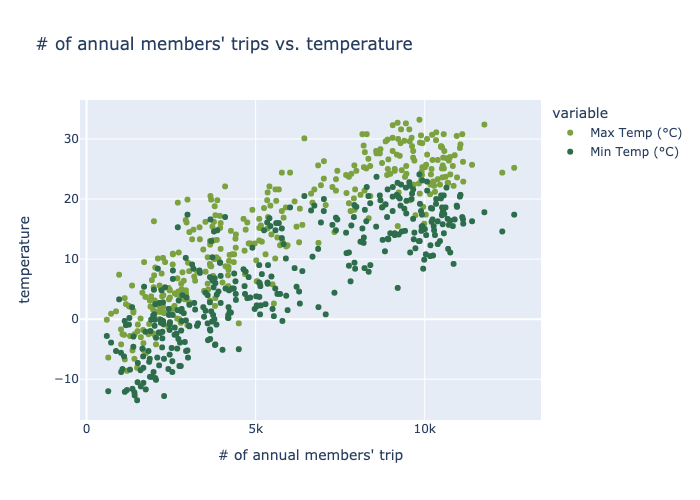

In [206]:
fig = px.scatter(byDate_weather, x="Annual", y=["Max Temp (°C)", "Min Temp (°C)"],
                 labels={
                     "Annual": "# of annual members' trip",
                     "value": "temperature"
                 },
                 hover_data={'Date':True},
                 title='# of annual members\' trips vs. temperature')
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/annual_temp.html")

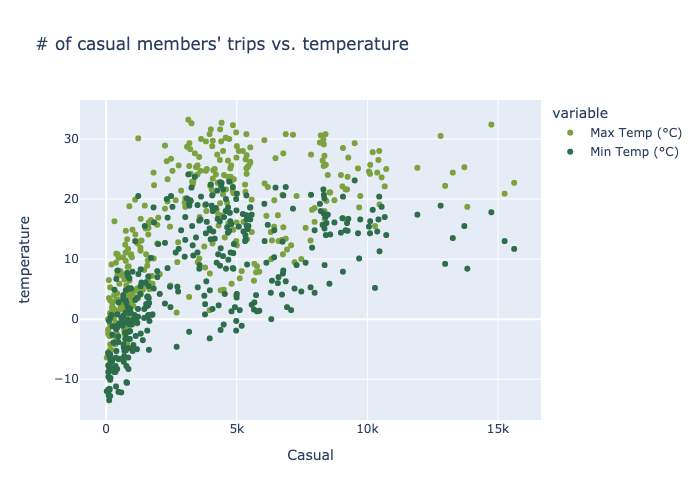

In [207]:
fig = px.scatter(byDate_weather, x="Casual", y=["Max Temp (°C)", "Min Temp (°C)"],
                 labels={
                     "Annual": "# of casual members' trip",
                     "value": "temperature"
                 },
                 hover_data={'Date':True},
                 title='# of casual members\' trips vs. temperature')

fig.show()
fig.show(renderer="png")
fig.write_html("visuals/casual_temp.html")
fig.show()

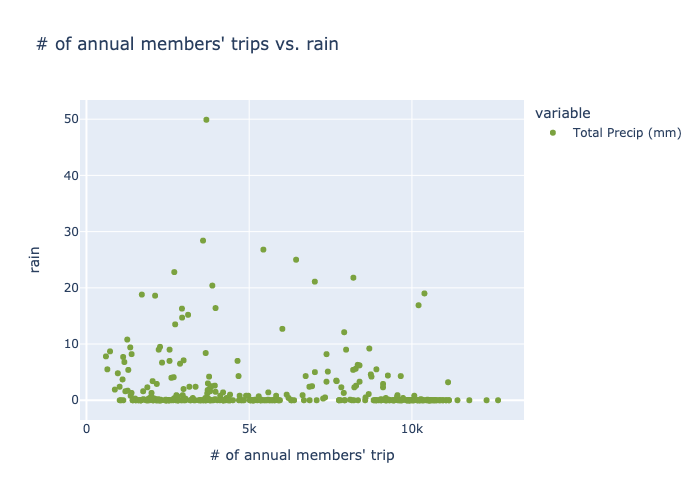

In [208]:
fig = px.scatter(byDate_weather, x="Annual", y=["Total Precip (mm)"],
                 labels={
                     "Annual": "# of annual members' trip",
                     "value": "rain"
                 },
                 hover_data={'Date':True},
                 title='# of annual members\' trips vs. rain')

fig.show()
fig.show(renderer="png")
fig.write_html("visuals/annual_rain.html")

In [209]:
fig = px.scatter(byDate_weather, x="Casual", y=["Snow on Grnd (cm)"],
                 labels={
                     "Annual": "# of annual members' trip",
                     "value": "snow on ground"
                 },
                 hover_data={'Date':True},
                 title='# of annual members\' trips vs. snow')
fig.show()

## What are the riders' behavior?
in terms of speed, duration, distance, time of the day, day of the week, etc.

### Bike riding speed

In [51]:
byMon_speed = df[df["avg_speed"] != 0].groupby([df['Start Time'].dt.month, 'User Type'])["avg_speed"].mean()
byMon_speed = byMon_speed.reset_index()

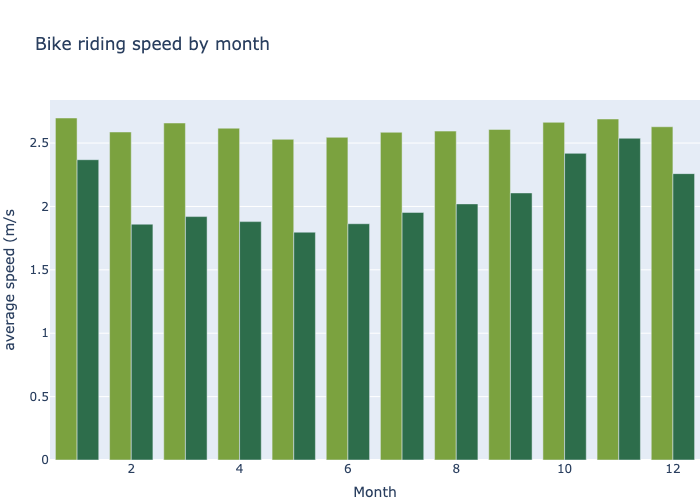

In [72]:
fig = px.bar(byMon_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Month', 'avg_speed':'average speed (m/s'}, 
             title='Bike riding speed by month')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byMon_speed-bar.html")

In [ ]:
byWeek_speed = df[df["avg_speed"] != 0].groupby([df['Start Time'].dt.weekday, 'User Type'])["avg_speed"].mean()
byWeek_speed = byWeek_speed.reset_index()

In [22]:
fig = px.bar(byWeek_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group',
             labels={'Start Time':'Day of the Week', 'avg_speed':'average speed'}, 
             title='Bike riding speed by day of the week', height=500)
#fig.show()
#fig.show(renderer="png")
#fig.write_html("visuals/byWeek_speed-bar.html")

In [53]:
byHr_speed = df[df["avg_speed"] != 0].groupby(df['Start Time'].dt.hour)["avg_speed"].mean()
byHr_speed = byHr_speed.reset_index()

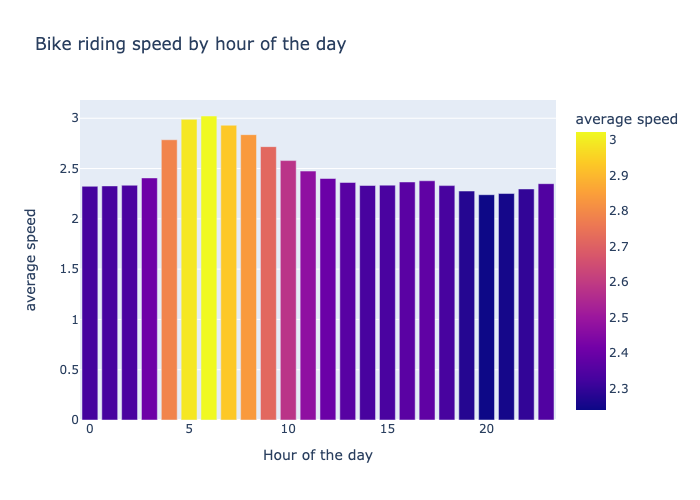

In [214]:
fig = px.bar(byHr_speed, x='Start Time', y='avg_speed',
             color='avg_speed',
             labels={'Start Time':'Hour of the day', 'avg_speed':'average speed'}, 
             title='Bike riding speed by hour of the day', height=500)
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byHr_speed-bar.html")

In [54]:
byHr_speed = df[df["avg_speed"] != 0].groupby([df['Start Time'].dt.hour, 'User Type'])["avg_speed"].mean()
byHr_speed = byHr_speed.reset_index()

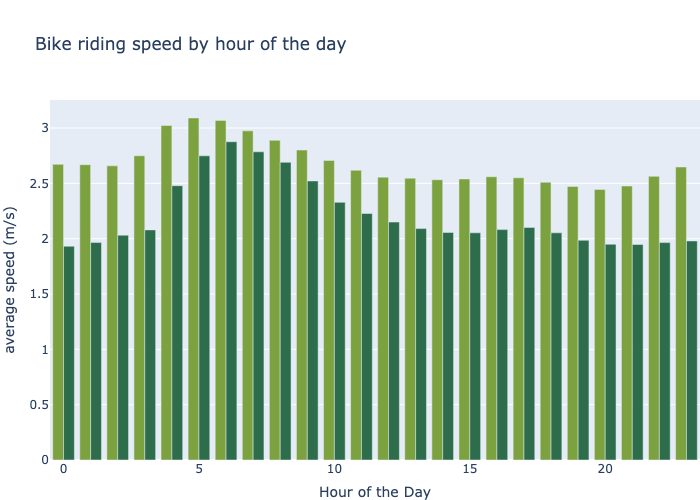

In [71]:
fig = px.bar(byHr_speed, x='Start Time', y='avg_speed',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Hour of the Day', 'avg_speed':'average speed (m/s)'}, 
             title='Bike riding speed by hour of the day')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byHr_speed-bar.html")

### Trip duration

In [56]:
byMon_duration = df.groupby([df['Start Time'].dt.month, 'User Type'])['Trip  Duration'].mean()
byMon_duration = byMon_duration.reset_index()
byMon_duration['Trip  Duration'] = byMon_duration['Trip  Duration']/60

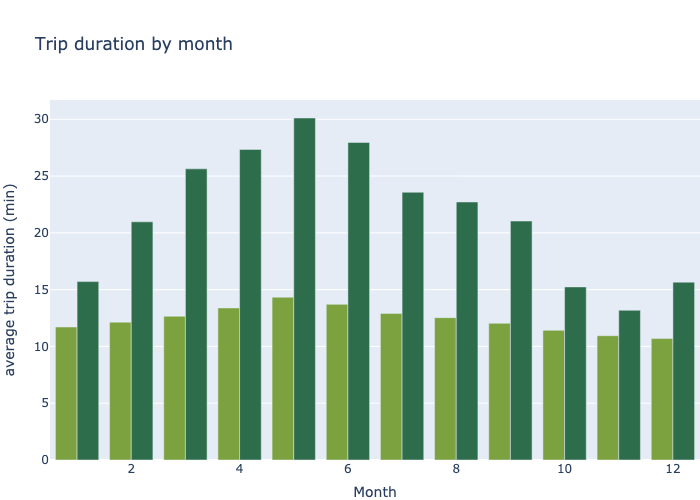

In [70]:
fig = px.bar(byMon_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Month', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by month')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byMon_duration-bar.html")

In [34]:
byWeek_duration = df.groupby([df['Start Time'].dt.weekday, 'User Type'])['Trip  Duration'].mean()
byWeek_duration = byWeek_duration.reset_index()
byWeek_duration['Trip  Duration'] = byWeek_duration['Trip  Duration']/60

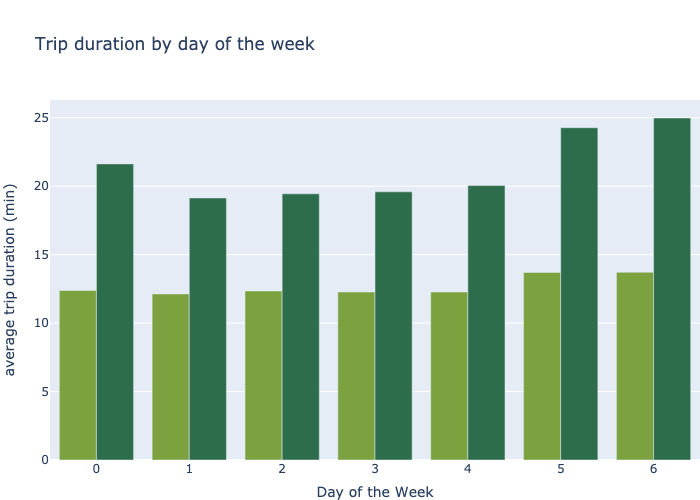

In [69]:
fig = px.bar(byWeek_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Day of the Week', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by day of the week')
fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byWeek_duration-bar.html")

In [37]:
byHr_duration = df.groupby([df['Start Time'].dt.hour, 'User Type'])['Trip  Duration'].mean()
byHr_duration = byHr_duration.reset_index()
byHr_duration['Trip  Duration'] = byHr_duration['Trip  Duration']/60

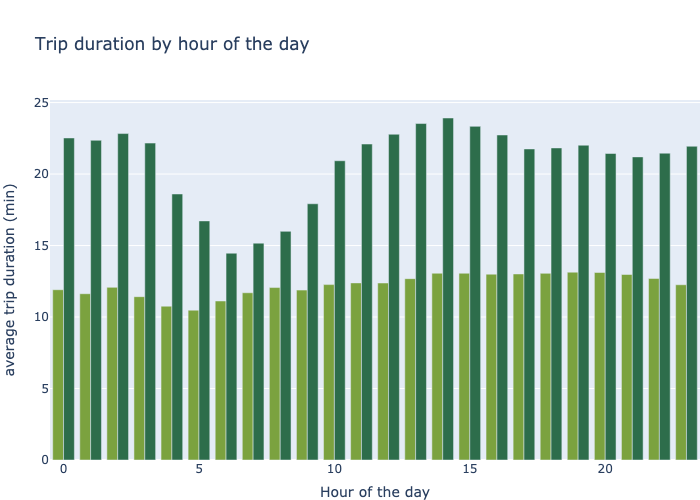

In [68]:
fig = px.bar(byHr_duration, x='Start Time', y='Trip  Duration',
             color='User Type', barmode = 'group', height = 500,
             labels={'Start Time':'Hour of the day', 'Trip  Duration':'average trip duration (min)'}, 
             title='Trip duration by hour of the day')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.update_layout(showlegend=False)
#fig.show()
fig.show(renderer="png")
fig.write_html("visuals/byHr_duration-bar.html")

### Stations

In [60]:
station = df.groupby(df['Start Station Id'])["Start Time"].count()
station = station.reset_index()
station = station.merge(bikeshare_stations, how='left', left_on='Start Station Id', right_on='station_id')

In [61]:
station = station.rename({"Start Time":"pick-up times"}, axis="columns")

In [62]:
station

Start Station Id  pick-up times station_id                          name  \
0               7000          20472       7000  Fort York  Blvd / Capreol Ct   
1               7001          11517       7001     Wellesley Station Green P   
2               7002          14543       7002    St. George St / Bloor St W   
3               7003           7396       7003      Madison Ave / Bloor St W   
4               7004           4702       7004       University Ave / Elm St   
..               ...            ...        ...                           ...   
609             7684            351       7684    Bay St / Harbour St (East)   
610             7685            189       7685                  King / Brant   
611             7686            157       7686  Lower Jarvis / The Esplanade   
612             7687            133       7687     Bloor / Gladstone - SMART   
613             7688              3       7688  High Park Blvd / Parkside Dr   

        lat      lon  
0   43.6398 -79.3960  
1   43.6650 -79.3836  
2   43.6673 -79.3994  
3   43.6672 -79.4028  
4   43.6565 -79.3891  
..      ...      ...  
609 43.6422 -79.3770  
610 43.6451 -79.3974  
611 43.6478 -79.3705  
612 43.6602 -79.4343  
613 43.6449 -79.4564  

[614 rows x 6 columns]

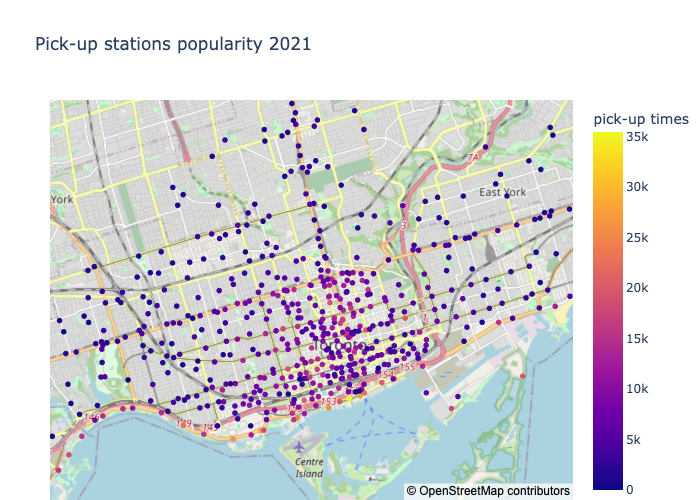

In [63]:
fig = px.scatter_mapbox(station, lat="lat", lon="lon", 
                        labels={'pick-up times':'pick-up times'},
                        hover_data={'lat':False, # remove from hover data
                                    'lon':False, # remove from hover data
                                    'name':True, # display
                                    'pick-up times':True # display 
                                    },
                        color="pick-up times", zoom=11,
                        title='Pick-up stations popularity 2021')

fig.update_layout(mapbox_style="open-street-map", margin ={'l':50,'b':0,'r':0})

#color_continuous_scale=px.colors.diverging.Portland
#color_continuous_scale="Viridis", 
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/popular-pick-up-stations.html")

In [64]:
station_byMon = df.groupby([df['Start Station Id'], df["Start Time"].dt.month])["Bike Id"].count()
station_byMon = station_byMon.reset_index()
station_byMon = station_byMon.merge(bikeshare_stations, how='left', left_on='Start Station Id', right_on='station_id')
station_byMon = station_byMon.rename({"Start Time":"month", "Bike Id":"pick-up times"}, axis = "columns")

In [65]:
station_byMon.describe()

month  pick-up times       lat       lon
count 7222.0000      7222.0000 7222.0000 7222.0000
mean     6.5324       481.0703   43.6645  -79.3933
std      3.4549       587.7290    0.0274    0.0539
min      1.0000         1.0000   43.5881  -79.5458
25%      4.0000       119.0000   43.6487  -79.4226
50%      7.0000       280.0000   43.6600  -79.3925
75%     10.0000       611.0000   43.6731  -79.3719
max     12.0000      6226.0000   43.7883  -79.1235

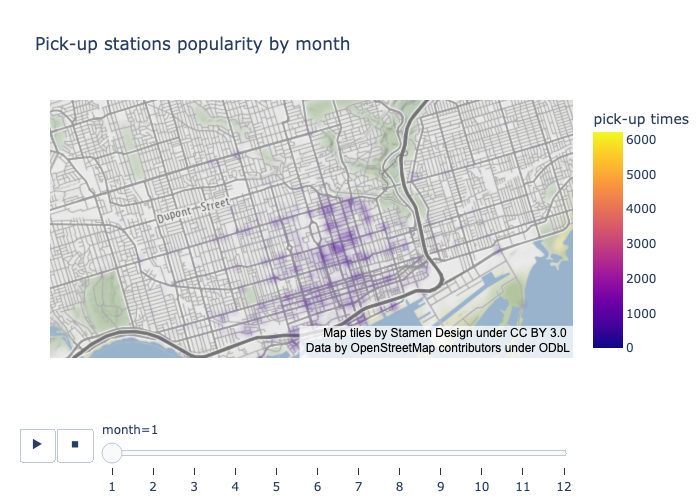

In [66]:
fig = px.density_mapbox(station_byMon, lat="lat", lon="lon", 
                        z="pick-up times", radius=10, zoom=11,
                        mapbox_style="stamen-terrain",
                        hover_data={'lat':False, 
                                    'lon':False, 
                                    'month':True,
                                    'name':True, 
                                    'pick-up times':True
                                    },
                        animation_frame="month",
                        range_color = [0,6226],
                        title='Pick-up stations popularity by month')

fig.update_layout(margin ={'l':50,'b':0,'r':0})
fig.show()
fig.show(renderer="png")
fig.write_html("visuals/popular-pick-up-stations_byMon.html")

## What are the most popular cycling routes? 
Average speed & duration on those routes? Any changes through the season?

In [67]:
routes = routes_info(df)
routes

Start Station Id End Station Id     routes station_id_start  \
0                  7021           7164  7021-7164             7021   
1                  7534           7164  7534-7164             7534   
2                  7162           7164  7162-7164             7162   
3                  7003           7164  7003-7164             7003   
4                  7442           7164  7442-7164             7442   
...                 ...            ...        ...              ...   
182080             7586           7678  7586-7678             7586   
182081             7584           7678  7584-7678             7584   
182082             7585           7678  7585-7678             7585   
182083             7679           7678  7679-7678             7679   
182084             7678           7678  7678-7678             7678   

                                     name_start  lat_start  lon_start  \
0                            Bay St / Albert St    43.6533   -79.3825   
1                       Walnut Ave / Queen St W    43.6455   -79.4111   
2                      Hayter St / Laplante Ave    43.6592   -79.3856   
3                      Madison Ave / Bloor St W    43.6672   -79.4028   
4                      Lonsdale Rd / Spadina Rd    43.6885   -79.4129   
...                                         ...        ...        ...   
182080                Finch West Subway Station    43.7652   -79.4913   
182081                The Pond Rd / Sentinel Rd    43.7696   -79.5026   
182082       Sentinel Rd / Finch Hydro Corridor    43.7641   -79.5013   
182083          York University Station (North)    43.7741   -79.5005   
182084  York University Station (South) - SMART    43.7734   -79.5002   

       station_id_end                                  name_end  lat_end  \
0                7164  Gould St / Yonge St (Ryerson University)  43.6574   
1                7164  Gould St / Yonge St (Ryerson University)  43.6574   
2                7164  Gould St / Yonge St (Ryerson University)  43.6574   
3                7164  Gould St / Yonge St (Ryerson University)  43.6574   
4                7164  Gould St / Yonge St (Ryerson University)  43.6574   
...               ...                                       ...      ...   
182080           7678   York University Station (South) - SMART  43.7734   
182081           7678   York University Station (South) - SMART  43.7734   
182082           7678   York University Station (South) - SMART  43.7734   
182083           7678   York University Station (South) - SMART  43.7734   
182084           7678   York University Station (South) - SMART  43.7734   

        lon_end  distance  
0      -79.3810  476.5533  
1      -79.3810 2765.3570  
2      -79.3810  414.0072  
3      -79.3810 2060.3700  
4      -79.3810 4307.3016  
...         ...       ...  
182080 -79.5002 1163.5696  
182081 -79.5002  466.5429  
182082 -79.5002 1037.1266  
182083 -79.5002   76.1519  
182084 -79.5002    0.0000  

[182085 rows x 12 columns]

In [34]:
routes_count = df.groupby("routes")["Bike Id"].count()
routes_count = routes_count.reset_index()
routes = routes.merge(routes_count[['routes', 'Bike Id']], how='left', on='routes')
routes = routes.rename({'Bike Id': 'count'}, axis='columns')

In [40]:
routes_50 = routes.sort_values(by = "count", ascending = False).head(50)

In [37]:
import plotly.graph_objects as go

In [45]:
fig = go.Figure(go.Scattermapbox(
    mode = "markers+lines",
    lon = routes_50['lon_start'],
    lat = routes_50['lat_start'],
    marker = {'size': 10}))

fig.add_trace(go.Scattermapbox(
    mode = "markers+lines",
    lon = routes_50['lon_end'],
    lat = routes_50['lat_end'],
    marker = {'size': 10}))

fig.update_layout(
    margin ={'l':0,'t':0,'b':0,'r':0},
    mapbox = {
        'center': {'lon': routes_50['lon_start'].mean(), 'lat': routes_50['lat_start'].mean()},
        'style': "stamen-terrain",
        'color':
        'zoom': 10})

fig.update_layout(mapbox_style="open-street-map")
fig.show()